In [90]:
import numpy as np
import pandas as pd
import re
import xml.etree.ElementTree as ET
from sklearn.utils import shuffle
import gensim 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import pickle
from scipy import spatial
from sklearn.decomposition import PCA
import itertools
import numpy as np
from scipy import spatial
from scipy.stats import norm
from gensim.models import Word2Vec
warnings.filterwarnings("ignore")
from multiprocessing import Pool

In [2]:
def readtags(doc):
    tree = ET.parse(doc)
    root = tree.getroot()
    name = doc.replace('.xml','')
    name = []
    for description in root.iter('seg'):
        p = description.text
        try:
            p=p.replace('\t','')
            p=p.replace('\n','')
            p = p.replace('.','')
            p = re.sub("\s\s+" , " ", p)
        except:
            pass
        name.append(p)
    return name

In [61]:
f = open('languages/Tamil.txt', 'r+', encoding="utf8")
tamil = f.readlines()
tamil = tamil[:31102]
tamil[0]= tamil[0].strip('\ufeffMMA')
import string
etamilclude = set(string.punctuation)
for i in range(0,len(tamil)):
    tamil[i] = tamil[i].strip('\n')
    tamil[i] = ''.join(ch for ch in tamil[i] if ch not in etamilclude)
farsi = readtags('Languages/Farsi.xml') 
Hindi = readtags('Languages/Hindi.xml')
Marathi = readtags('Languages/Marathi.xml')
Malayalam = readtags('Languages/Malayalam.xml') 
Telugu = readtags('Languages/Telugu.xml')
Kannada = readtags('Languages/Kannada.xml')
Nepali = readtags('Languages/Nepali.xml') 

In [7]:
lan = ["tamil"] * len(tamil)
data_1 = pd.DataFrame({"Text": tamil,"Language": lan})
lan = ["farsi"] * len(farsi)
data_2 = pd.DataFrame({"Text": farsi,"Language": lan})
lan = ["Hindi"] * len(Hindi)
data_3 = pd.DataFrame({"Text": Hindi,"Language": lan})
lan = ["Marathi"] * len(Marathi)
data_4 = pd.DataFrame({"Text": Marathi,"Language": lan})
lan = ["Malayalam"] * len(Malayalam)
data_5 = pd.DataFrame({"Text": Malayalam,"Language": lan})
lan = ["Telugu"] * len(Telugu)
data_6 = pd.DataFrame({"Text": Telugu,"Language": lan})
lan = ["Kannada"] * len(Telugu)
data_7 = pd.DataFrame({"Text": Telugu,"Language": lan})
lan = ["Nepali"] * len(Nepali)
data_8 = pd.DataFrame({"Text": Nepali,"Language": lan})

data = pd.concat([data_1, data_2,data_3,data_4,data_5,data_6,data_7,data_8], ignore_index=True)

In [9]:
data = shuffle(data)
data['Language'].value_counts()

Telugu       31102
Kannada      31102
tamil        31102
Hindi        31089
farsi        31020
Malayalam    30965
Nepali       30547
Marathi      30441
Name: Language, dtype: int64

In [19]:
df = data[:500]
df['Language'].value_counts()

Marathi      68
Nepali       68
Hindi        67
Malayalam    66
Kannada      62
tamil        61
Telugu       61
farsi        47
Name: Language, dtype: int64

In [20]:
##### TFIDF VECTORIZER
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['Text'][:500])
words = vectorizer.get_feature_names()
print("words", words[:10])

words ['112', '120', '129a', '193738ல', '1968', '19ல', '2005', '2009', '2025ம', '26']


In [34]:
##### COUNT VECTORIZER
vectorizer = CountVectorizer()
Y = vectorizer.fit_transform(data['Text'][:500])
words = vectorizer.get_feature_names()
print("words", words[:10])

words ['112', '120', '129a', '193738ல', '1968', '19ல', '2005', '2009', '2025ம', '26']


In [21]:
dense = X.toarray()

In [38]:
dense_count = Y.toarray()

In [22]:
import umap
embedding = umap.UMAP(n_neighbors=5,
                      min_dist=0.3,
                      metric='correlation').fit_transform(dense)

In [39]:
e = umap.UMAP(n_neighbors=5,
                      min_dist=0.3,
                      metric='correlation').fit_transform(dense_count)

In [36]:
df = pd.DataFrame(embedding, columns=('x', 'y'))
labels = list(data['Language'][:500])
df['class'] = labels
df.head()

,x,y,class
0,4.166046,-7.302840,Kannada
1,7.429426,4.960890,Hindi
2,4.577124,2.260933,Nepali
3,-0.653914,6.910487,farsi
4,7.308859,2.371423,Marathi


In [40]:
df = pd.DataFrame(e, columns=('x', 'y'))
labels = list(data['Language'][:500])
df['class'] = labels
df.head()

,x,y,class
0,-0.411533,-7.605384,Kannada
1,9.321000,6.814358,Hindi
2,5.773747,8.626001,Nepali
3,-0.525019,5.259418,farsi
4,6.849808,4.729980,Marathi


# TFIDF

<Figure size 864x864 with 0 Axes>

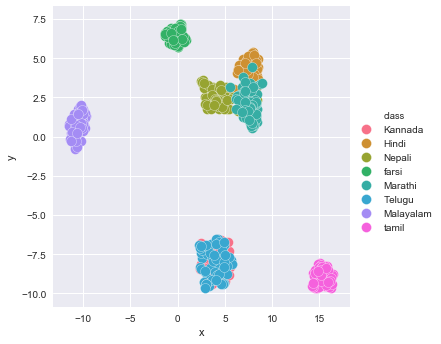

In [24]:
plt.figure(figsize=(12,12))
sns.pairplot(x_vars = ["x"], y_vars = ["y"],data = df, 
             hue = "class",size=5, plot_kws={"s": 100});
plt.show()

# COUNT

<Figure size 864x864 with 0 Axes>

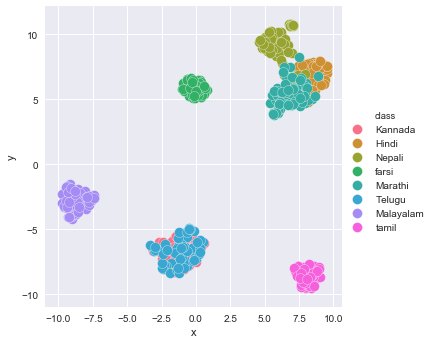

In [41]:
plt.figure(figsize=(12,12))
sns.pairplot(x_vars = ["x"], y_vars = ["y"],data = df, 
             hue = "class",size=5, plot_kws={"s": 100});
plt.show()

## Most of the Indo arayan and Dravidian Languages are space seperated

In [73]:
def lis(lan):
    l=[]
    lan = [x for x in lan if x]
    for i in lan:
        aa = i.split(' ')
        p = [x for x in aa if x]
        k = [w for w in p if not re.match(r'[A-Z]+', w, re.I)]
        l.append(k)
    return l

In [74]:
t = lis(tamil)
k = lis(Kannada)
h = lis(Hindi)
n = lis(Nepali)
f = lis(farsi)
ma = lis(Marathi)
te = lis(Telugu)
m = lis(Malayalam)

In [84]:
lan = ["tamil"] * len(t)
data_1 = pd.DataFrame({"Text": t,"Language": lan})
lan = ["Kannada"] * len(k)
data_2 = pd.DataFrame({"Text": k,"Language": lan})
lan = ["Hindi"] * len(h)
data_3 = pd.DataFrame({"Text": h,"Language": lan})
lan = ["Nepali"] * len(n)
data_4 = pd.DataFrame({"Text": n,"Language": lan})
lan = ["Marathi"] * len(ma)
data_5 = pd.DataFrame({"Text": ma,"Language": lan})
lan = ["Telugu"] * len(te)
data_6 = pd.DataFrame({"Text":te,"Language": lan})
lan = ["Malayalam"] * len(m)
data_7 = pd.DataFrame({"Text": m,"Language": lan})
lan = ["Farsi"] * len(f)
data_8 = pd.DataFrame({"Text": f,"Language": lan})


data = pd.concat([data_1, data_2,data_3,data_4,data_5,data_6,data_7,data_8], ignore_index=True)
data = shuffle(data)

In [86]:
data = data[:1000]
data['Language'].value_counts()

Marathi      151
Malayalam    137
tamil        124
Telugu       122
Nepali       122
Kannada      120
Hindi        114
Farsi        110
Name: Language, dtype: int64

In [88]:
e = list(data['Text'])

In [91]:
model = Word2Vec(sentences = e, size = 100, sg = 1, window = 3, min_count = 1, iter = 10, workers = Pool()._processes)

In [92]:
model.init_sims(replace = True)

In [93]:
# converting each word into its vector representation
for i in range(len(e)):
    e[i] = [model[word] for word in e[i]]

In [96]:
# define function to compute weighted vector representation of sentence
# parameter 'n' means number of words to be accounted when computing weighted average
def sent_PCA(sentence, n = 1):
    pca = PCA(n_components = n)
    pca.fit(np.array(sentence).transpose())
    variance = np.array(pca.explained_variance_ratio_)
    words = []
    for _ in range(n):
        idx = np.argmax(variance)
        words.append(np.amax(variance) * sentence[idx])
        variance[idx] = 0
    return np.sum(words, axis = 0)

In [97]:
sent_vectorized = []
# computing vector representation of each sentence
for sentence in e:
    sent_vectorized.append(sent_PCA(sentence))
v = sent_vectorized

In [98]:
embedding = umap.UMAP(n_neighbors=5,
                      min_dist=0.3,
                      metric='correlation').fit_transform(v)

In [99]:
df = pd.DataFrame(embedding, columns=('x', 'y'))
labels = list(data['Language'])
df['class'] = labels
df.head()

,x,y,class
0,-0.066475,2.099554,Telugu
1,-0.432988,-4.417849,Kannada
2,2.885395,-1.666097,Malayalam
3,0.422766,-3.678666,tamil
4,2.953087,-5.772013,Farsi


<Figure size 864x864 with 0 Axes>

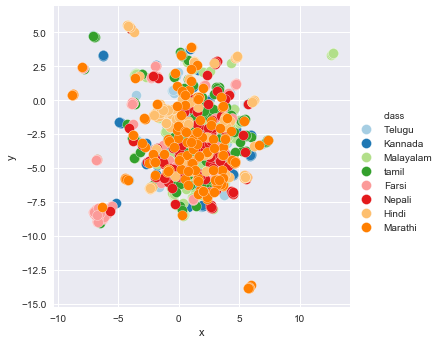

In [100]:
with sns.color_palette("Blues_d"):
    plt.figure(figsize=(12,12))
    sns.pairplot(x_vars = ["x"], y_vars = ["y"],data = df,hue = "class"
             ,palette = 'Paired',size=5, plot_kws={"s": 100});
    plt.show()

<Figure size 864x864 with 0 Axes>

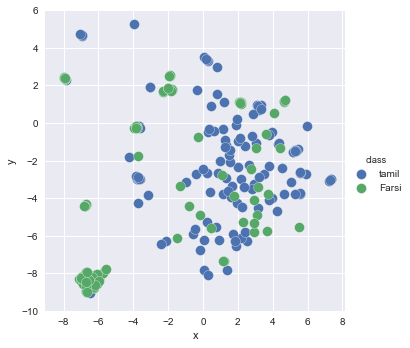

In [106]:
lan = ['Farsi','tamil']
sans_tam = df[df['class'].isin(lan)]
plt.figure(figsize=(12,12))
sns.pairplot(x_vars = ["x"], y_vars = ["y"],data = sans_tam,hue = "class",size=5, plot_kws={"s": 100});
plt.show()

<Figure size 864x864 with 0 Axes>

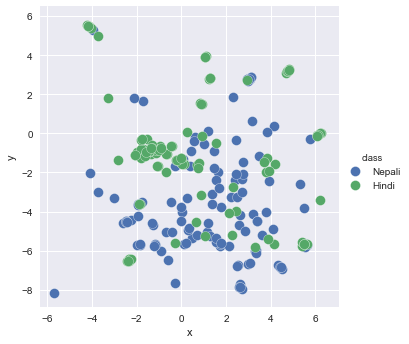

In [103]:
lan = ['Hindi','Nepali']
sans_tam = df[df['class'].isin(lan)]
plt.figure(figsize=(12,12))
sns.pairplot(x_vars = ["x"], y_vars = ["y"],data = sans_tam,hue = "class",size=5, plot_kws={"s": 100});
plt.show()

<Figure size 864x864 with 0 Axes>

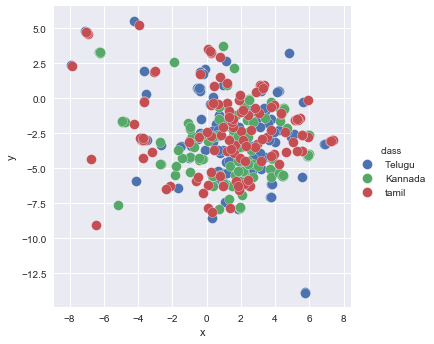

In [104]:
lan = ['Kannada','Telugu','tamil']
sans_tam = df[df['class'].isin(lan)]
plt.figure(figsize=(12,12))
sns.pairplot(x_vars = ["x"], y_vars = ["y"],data = sans_tam,hue = "class",size=5, plot_kws={"s": 100});
plt.show()